In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
config = {
    'domain': 'spouse',
    'supervision': 'majority',
#     'learn_deps': False,
#     'gen_model_search_space': 1,
#     'gen_init_params': {
#         'lf_propensity'         : True,
#         'class_prior'           : True,
#         'lf_class_propensity'   : True,
#         'seed'                  : None,
#     },
#     'gen_params_default': {
#         'step_size'     : 0.0001,
#         'decay'         : 0.90,
#         'reg_param'     : 0.50,
#         'epochs'        : 25,
#     },    
    'disc_model_class': 'logreg',    
    'disc_model_search_space': 1,
}

In [3]:
# Get DB connection string and add to globals
# NOTE: $SNORKELDB must be set before any snorkel imports
import os

default_db_name = 'babble_' + config['domain'] + ('_debug' if config.get('debug', False) else '')
DB_NAME = config.get('db_name', default_db_name)
if 'postgres' in config and config['postgres']:
    DB_TYPE = 'postgres'
else:
    DB_TYPE = 'sqlite'
    DB_NAME += '.db'
DB_ADDR = "localhost:{0}".format(config['db_port']) if 'db_port' in config else ""
os.environ['SNORKELDB'] = '{0}://{1}/{2}'.format(DB_TYPE, DB_ADDR, DB_NAME)
print("$SNORKELDB = {0}".format(os.environ['SNORKELDB']))

$SNORKELDB = sqlite:///babble_spouse.db


In [4]:
from snorkel import SnorkelSession
session = SnorkelSession()

# Resolve config conflicts (nb_config > local_config > global_config)
from snorkel.contrib.babble.pipelines import merge_configs, get_local_pipeline
config = merge_configs(config)

from snorkel.models import candidate_subclass
candidate_class = candidate_subclass(config['candidate_name'], config['candidate_entities'])

pipeline = get_local_pipeline(config['domain'])
pipe = pipeline(session, candidate_class, config)

Overwriting disc_model_search_space=10 to disc_model_search_space=1
Overwriting domain=None to domain=spouse
Overwriting print_freq=1 to print_freq=5
Overwriting disc_model_search_space=10 to disc_model_search_space=1
Overwriting LF_acc_prior_weight_default=1.0 to LF_acc_prior_weight_default=0.5
Overwriting decay=0.95 to decay=0.99
Overwriting init_class_prior=0 to init_class_prior=-1.15
Overwriting reg_param=0.1 to reg_param=0.5
Overwriting babbler_candidate_split=1 to babbler_candidate_split=[0, 1, 2]
Overwriting disc_model_class=lstm to disc_model_class=logreg
Overwriting supervision=generative to supervision=majority


In [5]:
for split in [0,1,2]:
    print(session.query(pipe.candidate_class).filter(
        pipe.candidate_class.split == split).count())

22195
2796
2697


In [6]:
# %time pipe.parse()

In [7]:
# %time pipe.extract()

In [8]:
# %time pipe.load_gold()

In [9]:
# %time pipe.featurize()

In [10]:
# %time pipe.collect()

In [11]:
# %time pipe.label()

In [12]:
%%time

import os
from tutorials.babble.spouse.spouse_qalf import QalfConverter

qc = QalfConverter(session, pipe.candidate_class)
matrix_path = (os.environ['SNORKELHOME'] + 
    '/tutorials/qalf/spouse/data/qalf_matrix_hp.tsv')
stats_path = (os.environ['SNORKELHOME'] + 
    '/tutorials/qalf/spouse/data/qalf_stats_hp.tsv')
L_train, L_dev, L_test = qc.convert(matrix_path, stats_path)

pipe.L_train = L_train
pipe.L_dev = L_dev
pipe.L_test = L_test

Clearing existing...
Running UDF...
[========================================] 100%

Clearing existing...
Running UDF...
[========================================] 100%

Clearing existing...
Running UDF...
[========================================] 100%

CPU times: user 1min 11s, sys: 1.23 s, total: 1min 12s
Wall time: 1min 11s


In [13]:
from snorkel.annotations import load_gold_labels
# L_gold_train = load_gold_labels(session, annotator_name='gold', split=0)
L_gold_dev   = load_gold_labels(session, annotator_name='gold', split=1)
# L_gold_test  = load_gold_labels(session, annotator_name='gold', split=2)

In [14]:
# L_train.lf_stats(session, labels=L_gold_train)
L_dev.lf_stats(session, labels=L_gold_dev)
# L_test.lf_stats(session, labels=L_gold_test)

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.
Who_is_ENT1_married_to?,0,0.033262,0.030401,0.017525,35,58,0,0,0.376344
Who_is_ENT2_married_to?,1,0.009299,0.008584,0.007153,4,22,0,0,0.153846
Who_got_married_to_ENT1_at_their_wedding?,2,0.013948,0.012160,0.006795,17,22,0,0,0.435897
Who_got_married_to_ENT2_at_their_wedding?,3,0.008941,0.006438,0.003934,9,16,0,0,0.360000
Who_is_ENT1's_husband?,4,0.047210,0.044707,0.023247,58,74,0,0,0.439394
Who_is_ENT2's_husband?,5,0.012518,0.012518,0.008941,7,28,0,0,0.200000
Who_is_ENT1's_wife?,6,0.053648,0.047568,0.025036,57,93,0,0,0.380000
Who_is_ENT2's_wife?,7,0.015379,0.013948,0.009299,7,36,0,0,0.162791
Who_else_is_the_parent_of_a_child_with_ENT1?,8,0.008941,0.008584,0.005722,8,17,0,0,0.320000
Who_else_is_the_parent_of_a_child_with_ENT2?,9,0.001788,0.001788,0.001431,2,3,0,0,0.400000


In [15]:
%time pipe.supervise()

Using L_train: <22195x24 sparse matrix of type '<type 'numpy.int64'>'
	with 9463 stored elements in Compressed Sparse Row format>
Using L_gold_train: <22195x1 sparse matrix of type '<type 'numpy.int64'>'
	with 22195 stored elements in Compressed Sparse Row format>
Positive Fraction: 7.0%

Using L_dev: <2796x24 sparse matrix of type '<type 'numpy.int64'>'
	with 1250 stored elements in Compressed Sparse Row format>
Using L_gold_dev: <2796x1 sparse matrix of type '<type 'numpy.int64'>'
	with 2796 stored elements in Compressed Sparse Row format>
Positive Fraction: 7.0%

Using L_test: <2697x24 sparse matrix of type '<type 'numpy.int64'>'
	with 1198 stored elements in Compressed Sparse Row format>
Using L_gold_test: <2697x1 sparse matrix of type '<type 'numpy.int64'>'
	with 2697 stored elements in Compressed Sparse Row format>
Positive Fraction: 8.3%

Saved 22195 marginals
CPU times: user 2.13 s, sys: 65.9 ms, total: 2.2 s
Wall time: 2.18 s


(22195,)


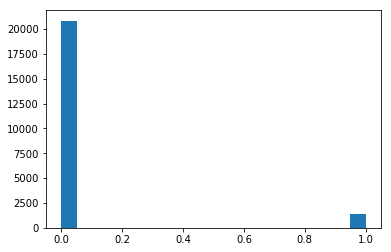

### [7.1] Begin training discriminative model
Skipping grid search.
[SparseLogisticRegression] Training model
[SparseLogisticRegression] n_train=5388  #epochs=20  batch size=128
[SparseLogisticRegression] Epoch 0 (0.48s)	Average loss=0.527120	Dev F1=42.03
[SparseLogisticRegression] Epoch 5 (2.94s)	Average loss=0.040244	Dev F1=45.67
[SparseLogisticRegression] Epoch 10 (5.47s)	Average loss=0.018670	Dev F1=45.88
[SparseLogisticRegression] Epoch 15 (8.02s)	Average loss=0.011280	Dev F1=46.12
[SparseLogisticRegression] Epoch 19 (10.11s)	Average loss=0.008097	Dev F1=45.55
[SparseLogisticRegression] Model saved as <SparseLogisticRegression>
[SparseLogisticRegression] Training done (10.54s)
[SparseLogisticRegression] Loaded model <SparseLogisticRegression>
[SparseLogisticRegression] Model saved as <discriminative_spouse>
### Done in 12.1s.

### [7.2] Evaluate generative model (opt_b=0.75)
### Done in 0.0s.

### [7.3] Evaluate discriminative model (opt_b=0.75)
### Done in 0.1s.

      F1 Score  

In [16]:
%time pipe.classify()